<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.482467,40.606887,87.968996,73.875799,-0.000019,237.934130,237.934044,0.000087
1,0.0,1.0,30.271721,76.217705,89.056058,60.635410,-0.000076,266.180818,266.180551,0.000266
2,0.0,2.0,57.636629,80.554003,74.372652,84.108394,-0.000249,306.671429,306.671730,-0.000301
3,0.0,3.0,98.336042,45.102342,86.579777,23.017152,0.000530,263.035843,263.035530,0.000313
4,0.0,4.0,55.431583,23.942438,66.855134,30.036015,-0.001367,186.263803,186.265231,-0.001428
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,87.880816,90.329907,61.788916,63.789506,0.000113,313.789259,313.789055,0.000204
29996,999.0,26.0,56.587838,78.414789,98.319501,88.668510,0.000008,331.990646,331.991177,-0.000531
29997,999.0,27.0,95.468060,31.762488,47.270563,48.733616,-0.000825,233.233901,233.234217,-0.000316
29998,999.0,28.0,64.145306,65.402460,31.925048,20.675052,-0.000008,192.147858,192.147245,0.000614


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.482467,40.606887,87.968996,73.875799,-0.000019,237.934130,237.934044,0.000087
1,0.0,1.0,30.271721,76.217705,89.056058,60.635410,-0.000076,266.180818,266.180551,0.000266
2,0.0,2.0,57.636629,80.554003,74.372652,84.108394,-0.000249,306.671429,306.671730,-0.000301
3,0.0,3.0,98.336042,45.102342,86.579777,23.017152,0.000530,263.035843,263.035530,0.000313
4,0.0,4.0,55.431583,23.942438,66.855134,30.036015,-0.001367,186.263803,186.265231,-0.001428
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,87.880816,90.329907,61.788916,63.789506,0.000113,313.789259,313.789055,0.000204
29996,999.0,26.0,56.587838,78.414789,98.319501,88.668510,0.000008,331.990646,331.991177,-0.000531
29997,999.0,27.0,95.468060,31.762488,47.270563,48.733616,-0.000825,233.233901,233.234217,-0.000316
29998,999.0,28.0,64.145306,65.402460,31.925048,20.675052,-0.000008,192.147858,192.147245,0.000614


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.482467  40.606887  87.968996  73.875799 -0.000019  237.934130   
      1.0    30.271721  76.217705  89.056058  60.635410 -0.000076  266.180818   
      2.0    57.636629  80.554003  74.372652  84.108394 -0.000249  306.671429   
      3.0    98.336042  45.102342  86.579777  23.017152  0.000530  263.035843   
      4.0    55.431583  23.942438  66.855134  30.036015 -0.001367  186.263803   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   87.880816  90.329907  61.788916  63.789506  0.000113  313.789259   
      26.0   56.587838  78.414789  98.319501  88.668510  0.000008  331.990646   
      27.0   95.468060  31.762488  47.270563  48.733616 -0.000825  233.233901   
      28.0   64.145306  65.402460  31.925048  20.675052 -0.000008  192.147858   
      29.0   74.923834  21.256702  64.953725  61.830045  0.004052  232.968358   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.934044  0.000087  
      1.0    266.180551  0.000266  
      2.0    306.671730 -0.000301  
      3.0    263.035530  0.000313  
      4.0    186.265231 -0.001428  
...                 ...       ...  
999.0 25.0   313.789055  0.000204  
      26.0   331.991177 -0.000531  
      27.0   233.234217 -0.000316  
      28.0   192.147245  0.000614  
      29.0   232.964122  0.004236  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.482467  40.606887  87.968996  73.875799 -0.000019  237.934130   
      1.0    30.271721  76.217705  89.056058  60.635410 -0.000076  266.180818   
      2.0    57.636629  80.554003  74.372652  84.108394 -0.000249  306.671429   
      3.0    98.336042  45.102342  86.579777  23.017152  0.000530  263.035843   
      4.0    55.431583  23.942438  66.855134  30.036015 -0.001367  186.263803   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   87.880816  90.329907  61.788916  63.789506  0.000113  313.789259   
      26.0   56.587838  78.414789  98.319501  88.668510  0.000008  331.990646   
      27.0   95.468060  31.762488  47.270563  48.733616 -0.000825  233.233901   
      28.0   64.145306  65.402460  31.925048  20.675052 -0.000008  192.147858   
      29.0   74.923834  21.256702  64.953725  61.830045  0.004052  232.968358   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.934044  0.000087  
      1.0    266.180551  0.000266  
      2.0    306.671730 -0.000301  
      3.0    263.035530  0.000313  
      4.0    186.265231 -0.001428  
...                 ...       ...  
999.0 25.0   313.789055  0.000204  
      26.0   331.991177 -0.000531  
      27.0   233.234217 -0.000316  
      28.0   192.147245  0.000614  
      29.0   232.964122  0.004236  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.482467,40.606887,87.968996,73.875799,-0.000019,237.934130,237.934044,0.000087
1,0.0,1.0,30.271721,76.217705,89.056058,60.635410,-0.000076,266.180818,266.180551,0.000266
2,0.0,2.0,57.636629,80.554003,74.372652,84.108394,-0.000249,306.671429,306.671730,-0.000301
3,0.0,3.0,98.336042,45.102342,86.579777,23.017152,0.000530,263.035843,263.035530,0.000313
4,0.0,4.0,55.431583,23.942438,66.855134,30.036015,-0.001367,186.263803,186.265231,-0.001428
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,87.880816,90.329907,61.788916,63.789506,0.000113,313.789259,313.789055,0.000204
29996,999.0,26.0,56.587838,78.414789,98.319501,88.668510,0.000008,331.990646,331.991177,-0.000531
29997,999.0,27.0,95.468060,31.762488,47.270563,48.733616,-0.000825,233.233901,233.234217,-0.000316
29998,999.0,28.0,64.145306,65.402460,31.925048,20.675052,-0.000008,192.147858,192.147245,0.000614


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.482467  40.606887  87.968996  73.875799 -0.000019  237.934130   
      1.0    30.271721  76.217705  89.056058  60.635410 -0.000076  266.180818   
      2.0    57.636629  80.554003  74.372652  84.108394 -0.000249  306.671429   
      3.0    98.336042  45.102342  86.579777  23.017152  0.000530  263.035843   
      4.0    55.431583  23.942438  66.855134  30.036015 -0.001367  186.263803   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   87.880816  90.329907  61.788916  63.789506  0.000113  313.789259   
      26.0   56.587838  78.414789  98.319501  88.668510  0.000008  331.990646   
      27.0   95.468060  31.762488  47.270563  48.733616 -0.000825  233.233901   
      28.0   64.145306  65.402460  31.925048  20.675052 -0.000008  192.147858   
      29.0   74.923834  21.256702  64.953725  61.830045  0.004052  232.968358   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.934044  0.000087  
      1.0    266.180551  0.000266  
      2.0    306.671730 -0.000301  
      3.0    263.035530  0.000313  
      4.0    186.265231 -0.001428  
...                 ...       ...  
999.0 25.0   313.789055  0.000204  
      26.0   331.991177 -0.000531  
      27.0   233.234217 -0.000316  
      28.0   192.147245  0.000614  
      29.0   232.964122  0.004236  

[30000 rows x 8 columns]

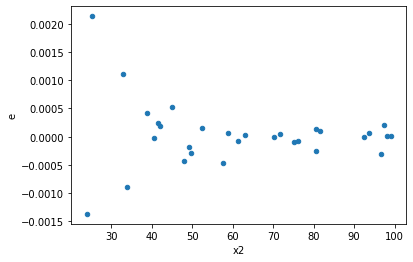

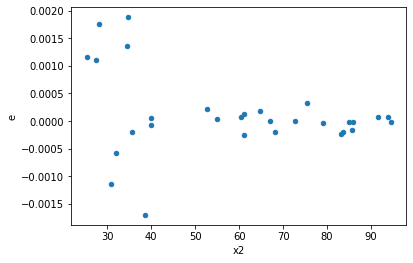

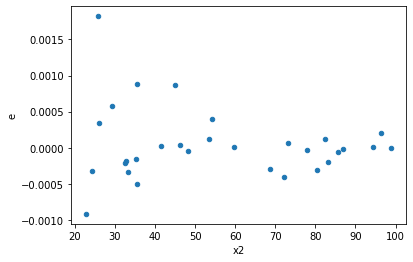

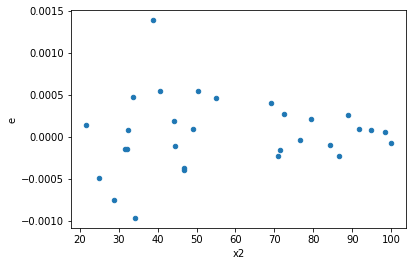

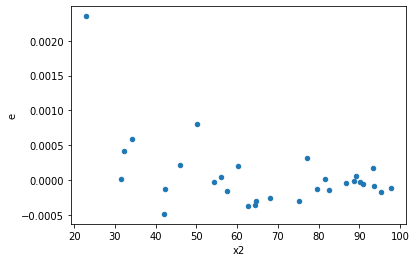

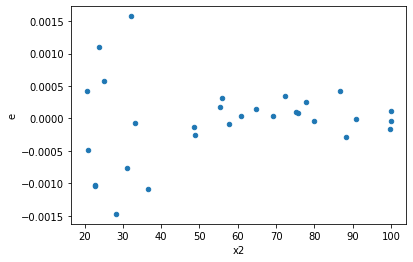

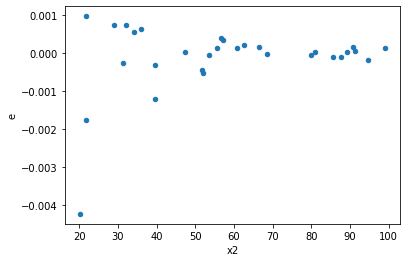

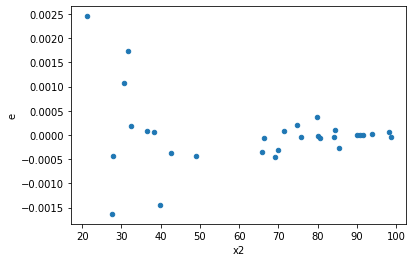

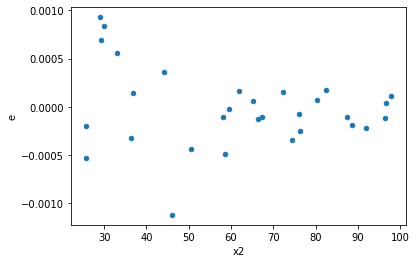

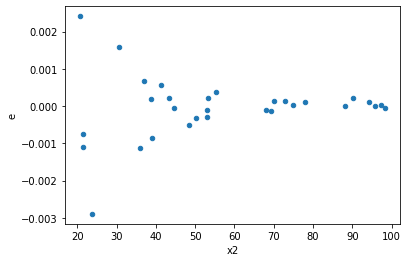

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
808.0,8.0,8.0,1.4292204686977752e-07,1.7460351005694548e-07,1.786525585872219e-08,2.1825438757118186e-08,1.2216695316156108,0.7838996629223591,0.6080501685388204,0.39194983146117957,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,3.6040510981364504e-06,2.090662747123056e-07,4.505063872670563e-07,2.61332843390382e-08,0.05800868772931873,0.0005530811688329594,Reject001=0 : Heteroscedasticity
1.0,8.0,8.0,7.572051921863992e-06,2.5451170687155155e-07,9.46506490232999e-07,3.1813963358943944e-08,0.033611986486339236,7.233358593660395e-05,Reject001=0 : Heteroscedasticity
2.0,8.0,8.0,4.3511544611689964e-06,1.8591550180160286e-07,5.438943076461246e-07,2.3239437725200358e-08,0.04272785612663683,0.00017860544987863527,Reject001=0 : Heteroscedasticity
3.0,8.0,8.0,2.049937799620626e-06,3.3219797195266317e-07,2.5624222495257827e-07,4.1524746494082896e-08,0.16205270814272596,0.018602124650710178,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,2.700965286932182e-06,9.818192299572186e-08,3.3762066086652274e-07,1.2272740374465232e-08,0.03635067931851843,9.729358897477713e-05,Reject001=0 : Heteroscedasticity
5.0,8.0,8.0,8.397584468528753e-06,3.214068122074258e-07,1.0496980585660942e-06,4.017585152592823e-08,0.03827372185560592,0.00011816892417567003,Reject001=0 : Heteroscedasticity
6.0,8.0,8.0,1.7120876027294412e-05,9.36358608749537e-08,2.1401095034118015e-06,1.1704482609369212e-08,0.005469104543814096,6.0479362873663e-08,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,9.001707655498506e-06,2.0086992310394212e-07,1.1252134569373133e-06,2.5108740387992765e-08,0.022314646375040284,1.5072486512543762e-05,Reject001=0 : Heteroscedasticity
8.0,8.0,8.0,2.786764691707895e-06,2.745077499848811e-07,3.483455864634869e-07,3.4313468748110134e-08,0.09850410075945322,0.0036228278424508186,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    950
Reject001=1 : Homoscedasticity       50
Name: Result_test, dtype: int64